## NAME - SWETHA S
## TSF GRIP TASK 4 - TERRORISM
### Steps Involved
#### 1. Import the required libraries
#### 2. Load the dataset
#### 3. Exploratory analysis
#### 4. Visualize
#### 5. Understanding from the visualization

In [1]:
# import libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#to exclude the warnings
import warnings
warnings.simplefilter("ignore")

In [10]:
# load the dataset
#encoding=latina1 is used to read the encoded data
data=pd.read_csv("D:\\terrorism.csv",encoding='latin1')
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [11]:
df=data.copy()

data=data[['iyear', 'imonth', 'iday','extended', 'country_txt', 
       'region_txt', 'city', 'success', 'suicide','nwound','nkill',
       'targtype1_txt', 'gname', 'weaptype1_txt']]
data.head()

,iyear,imonth,iday,extended,country_txt,region_txt,city,success,suicide,nwound,nkill,targtype1_txt,gname,weaptype1_txt
0,1970,7,2,0,Dominican Republic,Central America & Caribbean,Santo Domingo,1,0,0.0,1.0,Private Citizens & Property,MANO-D,Unknown
1,1970,0,0,0,Mexico,North America,Mexico city,1,0,0.0,0.0,Government (Diplomatic),23rd of September Communist League,Unknown
2,1970,1,0,0,Philippines,Southeast Asia,Unknown,1,0,0.0,1.0,Journalists & Media,Unknown,Unknown
3,1970,1,0,0,Greece,Western Europe,Athens,1,0,NaN,NaN,Government (Diplomatic),Unknown,Explosives
4,1970,1,0,0,Japan,East Asia,Fukouka,1,0,NaN,NaN,Government (Diplomatic),Unknown,Incendiary


In [12]:
data.columns

Index(['iyear', 'imonth', 'iday', 'extended', 'country_txt', 'region_txt',
       'city', 'success', 'suicide', 'nwound', 'nkill', 'targtype1_txt',
       'gname', 'weaptype1_txt'],
      dtype='object')

In [14]:
#checking for null values
data.isnull().sum()

iyear                0
imonth               0
iday                 0
extended             0
country_txt          0
region_txt           0
city               434
success              0
suicide              0
nwound           16311
nkill            10313
targtype1_txt        0
gname                0
weaptype1_txt        0
dtype: int64

In [15]:
#drop the null value
data.dropna(axis=0, inplace=True)

In [16]:
#renaming the columns
data.rename(columns={'iyear': 'year', 'imonth': 'month', 'iday':'day', 'country_txt':'country','attacktype1_txt':'attactype','nwound':'wound','nkill':'killed',
                  'region_txt':'region', 'targtype1_txt':'target', 'gname':'group', 'weaptype1_txt':'weapon'}, inplace=True)
data.head()

,year,month,day,extended,country,region,city,success,suicide,wound,killed,target,group,weapon
0,1970,7,2,0,Dominican Republic,Central America & Caribbean,Santo Domingo,1,0,0.0,1.0,Private Citizens & Property,MANO-D,Unknown
1,1970,0,0,0,Mexico,North America,Mexico city,1,0,0.0,0.0,Government (Diplomatic),23rd of September Communist League,Unknown
2,1970,1,0,0,Philippines,Southeast Asia,Unknown,1,0,0.0,1.0,Journalists & Media,Unknown,Unknown
5,1970,1,1,0,United States,North America,Cairo,1,0,0.0,0.0,Police,Black Nationalists,Firearms
6,1970,1,2,0,Uruguay,South America,Montevideo,0,0,0.0,0.0,Police,Tupamaros (Uruguay),Firearms


In [17]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
year,164384.0,2003.174348,12.789087,1970.0,1991.0,2009.0,2014.0,2017.0
month,164384.0,6.481999,3.388046,0.0,4.0,6.0,9.0,12.0
day,164384.0,15.516644,8.807003,0.0,8.0,15.0,23.0,31.0
extended,164384.0,0.033069,0.178817,0.0,0.0,0.0,0.0,1.0
success,164384.0,0.882160,0.322419,0.0,1.0,1.0,1.0,1.0
suicide,164384.0,0.037248,0.189370,0.0,0.0,0.0,0.0,1.0
wound,164384.0,3.168788,36.048736,0.0,0.0,0.0,2.0,8191.0
killed,164384.0,2.133419,9.821208,0.0,0.0,0.0,2.0,1384.0


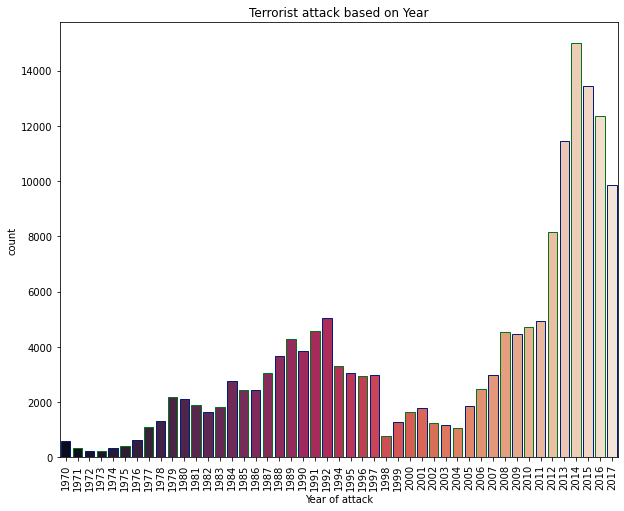

In [21]:
#attacks based on year
plt.subplots(figsize=(10,8))
sns.countplot('year',data=data,palette='rocket',edgecolor=sns.color_palette('dark',2))
plt.xticks(rotation=90)
plt.xlabel('Year of attack')
plt.title('Terrorist attack based on Year')
plt.show()

In [22]:
#Time line of attacks
data['Decade'] = pd.cut(data['year'], bins=[1969, 1980, 1990, 2000, 2010, 2020], labels=['1970-1980', '1980-1990', '1990-2000', '2000-2010', '2010-2017'])
data[['year','Decade']].sample(10)

,year,Decade
75905,2003,2000-2010
3716,1976,1970-1980
94505,2009,2000-2010
22687,1984,1980-1990
68557,1999,1990-2000
45772,1991,1990-2000
100516,2011,2010-2017
33025,1987,1980-1990
22139,1984,1980-1990
171692,2017,2010-2017


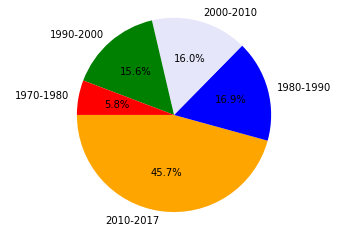

In [27]:
#attack percentage based on decades
dec = data['Decade'].value_counts()

colors= 'orange','blue','lavender','green','red'
plt.pie(dec,labels=dec.index,colors=colors,autopct='%1.1f%%', startangle=180)
plt.axis('equal')
plt.show()


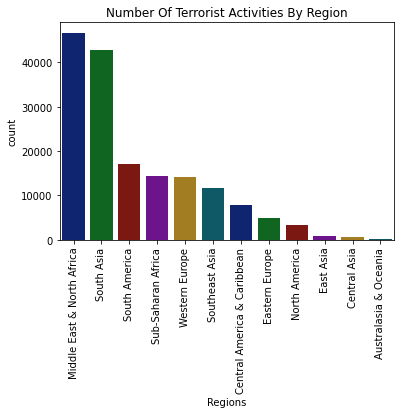

In [28]:
#Attacks based on region

sns.countplot('region',data=data,palette='dark',order=data['region'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Regions')
plt.title('Number Of Terrorist Activities By Region')
plt.show()

In [29]:
#most attacked city

def city_name(country=list(data['country'].unique())):
    a=data[data['country']==country]
    a=pd.DataFrame(a['city'].value_counts().iloc[1:10])
    return a.style.highlight_max(axis=0, color='red').highlight_min(axis=0, color='green')

In [30]:
city_name(data['country'])

,city
Baghdad,7374
Karachi,2571
Lima,2124
Mosul,2114
Mogadishu,1375
Santiago,1354
Belfast,1328
San Salvador,1254
Istanbul,1011


In [31]:
#Mostly used weapons
def weapon_type(country=list(data['country'].unique())):
    a=data[data['country']==country]
    a=pd.DataFrame(a['weapon'].value_counts())
    return a.style.highlight_max(axis=0)

In [32]:
weapon_type(data['country'])

,weapon
Explosives,86231
Firearms,51645
Unknown,12083
Incendiary,10285
Melee,3381
Chemical,302
Sabotage Equipment,136
"Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)",133
Other,109
Fake Weapons,33


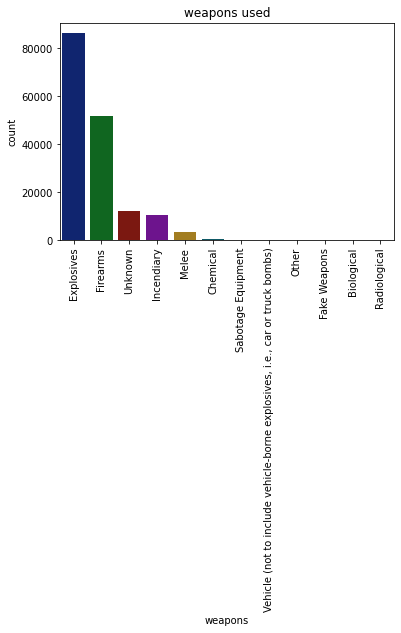

In [35]:
sns.countplot('weapon',data=data,palette='dark',order=data['weapon'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('weapons')
plt.title('weapons used')
plt.show()


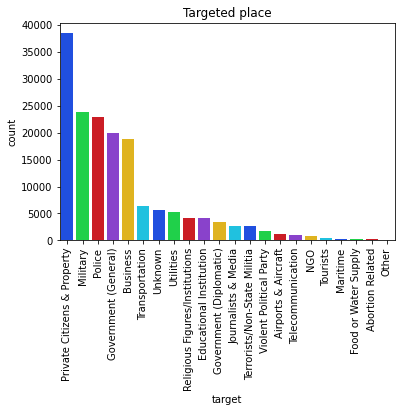

In [37]:
#Target place

sns.countplot('target',data=data,palette='bright',order=data['target'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('target')
plt.title('Targeted place')
plt.show()

Text(0, 0.5, 'Wounded')

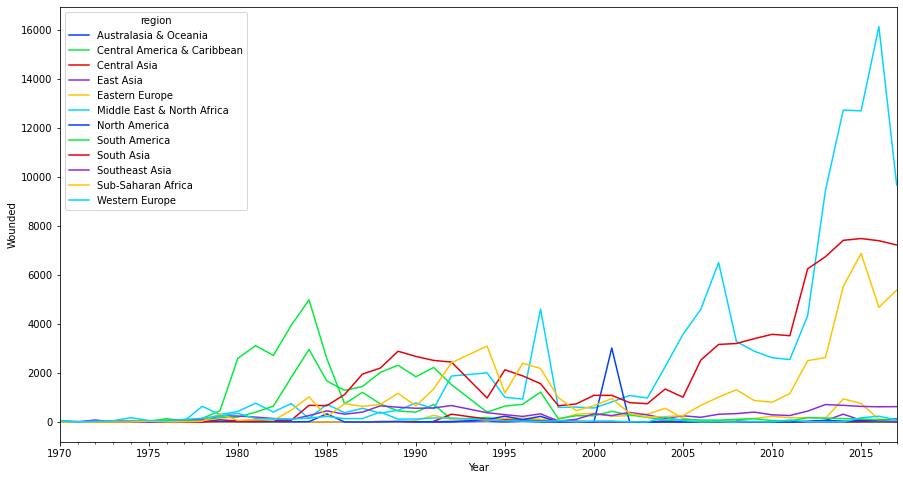

In [40]:
#Highly affected
p=data.groupby(['year','region'])['killed'].sum()
plot_df = p.unstack('region').loc[:]
plot_df.index = pd.PeriodIndex(plot_df.index.tolist(),freq='A')
plot_df.plot(figsize=(15,8),color=sns.color_palette('bright',12))
plt.xlabel("Year")
plt.ylabel("Wounded")

In [41]:
success = data['success'].value_counts()
success

1    145013
0     19371
Name: success, dtype: int64

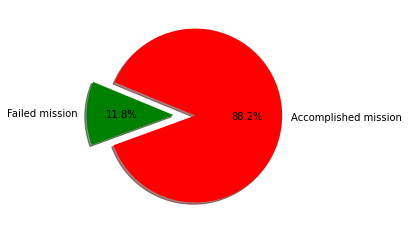

In [44]:
#percentage of accomplished mission and failure

labels = 'Accomplished mission', 'Failed mission'

colors = ['red', 'green']
explode = (0.25, 0)
plt.pie(success, labels=labels, explode=explode,colors=colors,autopct='%1.1f%%', shadow=True, startangle=200)
plt.show()

### Understanding from the visualization
1. Most of the attacks were accomplished in the year **2010-2017** 
2. Most affected city is **Baghdad** 
3. **Middle east people and South Africans** were highly affected
4. Most used weapons were **Exoplosive and firearms**